## simulate a biased coin(Bernoulli), compute running mean & running varience

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# parameters
p = 0.7    # true probability of 'heads'
N = 10000
seed = 42

In [50]:
np.random.seed(seed)
samples = np.random.binomial(1,p,size=N)
# print(samples)

In [52]:
# print(np.cumsum(samples))
# print(np.arange(1, 6))
running_mean = np.cumsum(samples) / np.arange(1, N+1)
# print(running_mean)   # running mean

In [53]:
running_var = np.empty(N)
mean = 0.0
M2 = 0.0
count = 0
for i, x in enumerate(samples, start=1):
    count +=1
    delta = x - mean
    mean += delta / count
    delta2 = x - mean
    M2 += delta * delta2
    if count < 2:
        running_var[i-1] = 0.0     # varience undefined for single samples
    else:
        running_var[i-1] = M2 / (count -1)


In [ ]:
# running_var

array([0.        , 0.5       , 0.33333333, 0.33333333, 0.3       ])

In [54]:
# theoritical values for Bernoullli(p)
theoretical_mean = p
theoretical_var = p*(1-p)
print(theoretical_mean, theoretical_var)

0.7 0.21000000000000002


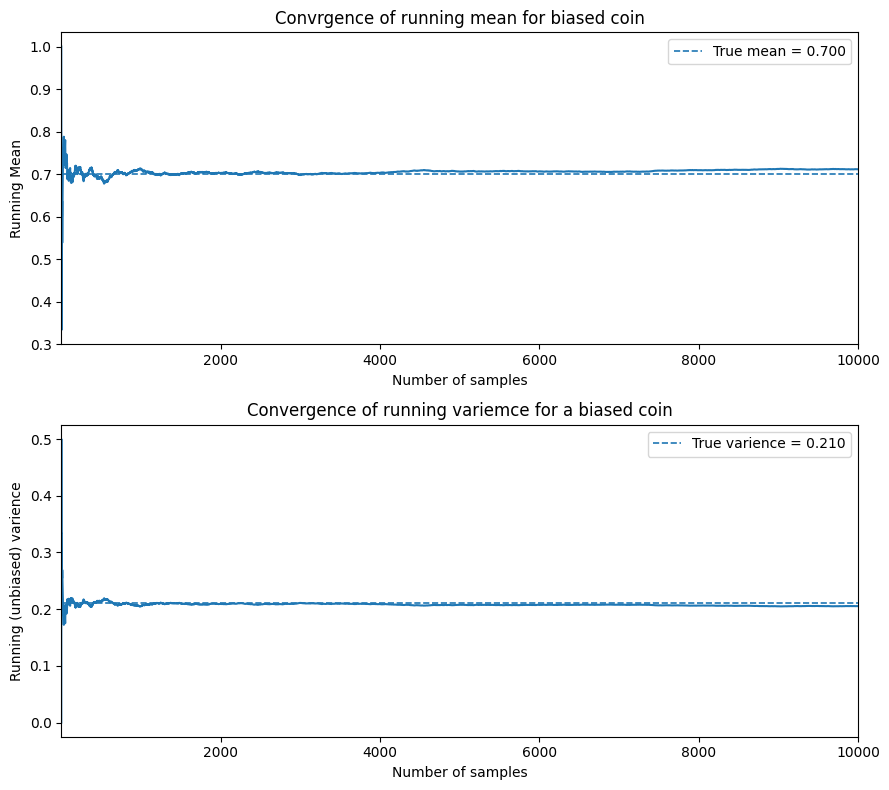

In [55]:
# plot running varience
fig, axes = plt.subplots(2, 1, figsize=(9,8))
ax = axes[0]
ax.plot(np.arange(1, N+1), running_mean)
ax.axhline(theoretical_mean, linestyle='--', linewidth=1.2, label=f"True mean = {theoretical_mean:.3f}")
ax.set_xlim(1,N+1)
ax.set_xlabel("Number of samples")
ax.set_ylabel("Running Mean")
ax.set_title("Convrgence of running mean for biased coin")
ax.legend()

#plot running varience
ax2 = axes[1]
ax2.plot(np.arange(1, N+1), running_var)
ax2.axhline(theoretical_var, linestyle='--', linewidth=1.2,label=f"True varience = {theoretical_var:.3f}")
ax2.set_xlim(1,N+1)
ax2.set_xlabel("Number of samples")
ax2.set_ylabel("Running (unbiased) varience")
ax2.set_title("Convergence of running variemce for a biased coin")
ax2.legend()

plt.tight_layout()
plt.show()

In [57]:
# print final estimates and errors
final_mean = running_mean[-1]
final_var = running_var[-1]
print(f"True mean : {theoretical_mean:.6f} | Estimated mean after {N} samples: {final_mean:.6f} | Error: {final_mean-theoretical_mean:+.6f}")
print(f"True varience : {theoretical_var:.6f} | Estimated var after {N} samples: {final_var:.6f} | Error: {final_var - theoretical_var:+.6f}")

True mean : 0.700000 | Estimated mean after 10000 samples: 0.711300 | Error: +0.011300
True varience : 0.210000 | Estimated var after 10000 samples: 0.205373 | Error: -0.004627
